### Importing Libraries

In [1]:
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np


### Loading Data

In [3]:
# Define base directory
proj_work_base_dir = r"C:\Users\acer\Desktop\archive\images"

# Define train and validation directories
proj_work_train_dir = os.path.join(proj_work_base_dir, 'train')
proj_work_val_dir = os.path.join(proj_work_base_dir, 'validation')

# List classes from train directory
proj_work_classes = os.listdir(proj_work_train_dir)
print("Classes found:", proj_work_classes)


Classes found: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


### Distribution of Images

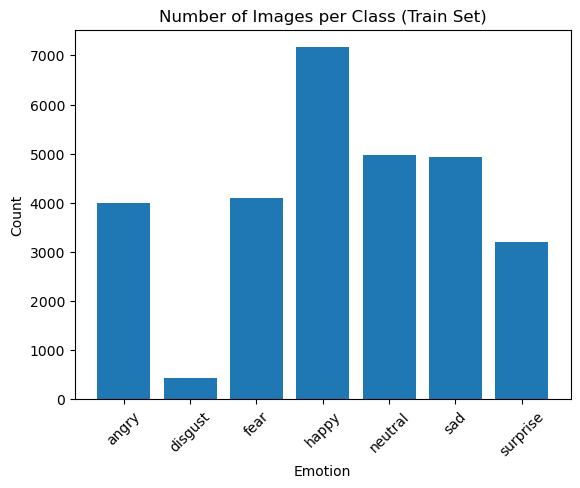

In [10]:
from collections import Counter

# Count images per class in train directory
proj_work_train_counts = {cls: len(os.listdir(os.path.join(proj_work_train_dir, cls))) for cls in proj_work_classes}

# Plot barplot
plt.bar(proj_work_train_counts.keys(), proj_work_train_counts.values())
plt.title("Number of Images per Class (Train Set)")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### Random Image per category

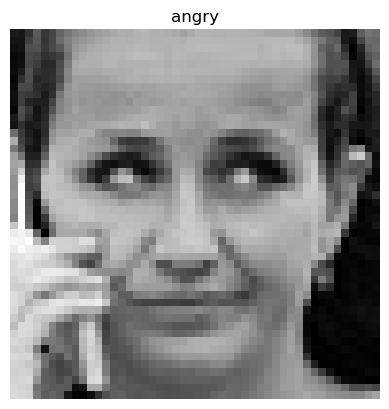

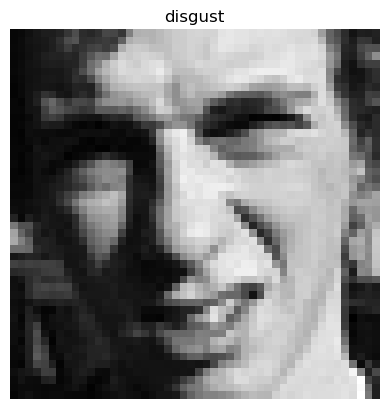

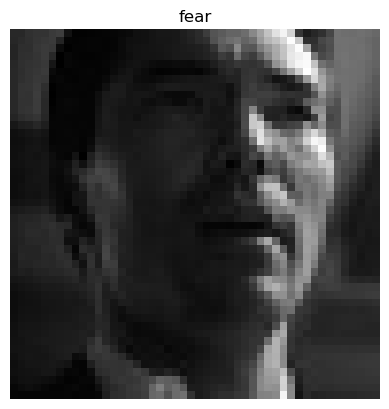

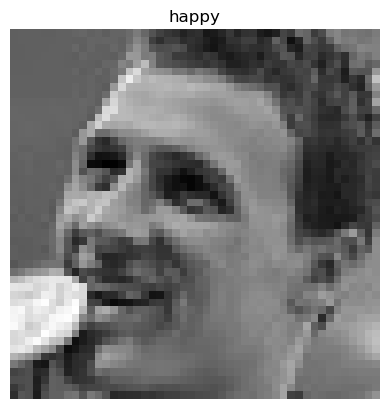

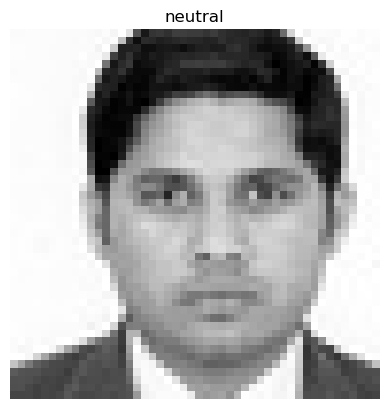

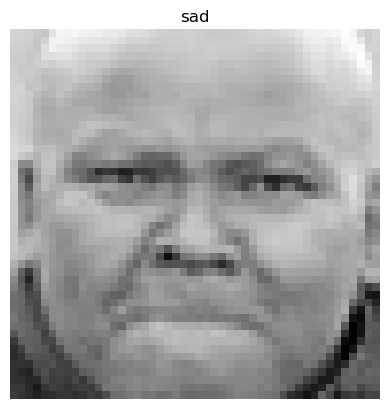

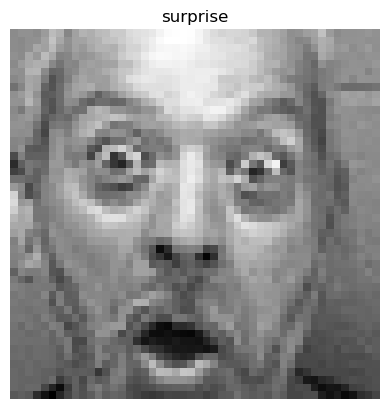

In [13]:
for emotion in proj_work_classes:
    emotion_dir = os.path.join(proj_work_train_dir, emotion)
    random_image = random.choice(os.listdir(emotion_dir))
    random_image_path = os.path.join(emotion_dir, random_image)
    
    # Display the image
    img = plt.imread(random_image_path)
    plt.imshow(img, cmap='gray')  # Grayscale
    plt.title(emotion)
    plt.axis('off')
    plt.show()


### Data Augumentation to increase Data

In [44]:
# Define image size and batch size
proj_work_img_size = (48, 48)
proj_work_batch_size = 512

# Data augmentation and rescaling for train and validation
proj_work_train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

proj_work_val_datagen = ImageDataGenerator(rescale=1.0/255)

# Data generators
proj_work_train_gen = proj_work_train_datagen.flow_from_directory(
    proj_work_train_dir,
    target_size=proj_work_img_size,
    batch_size=proj_work_batch_size,
    color_mode='grayscale',  # For grayscale images
    class_mode='categorical'
)

proj_work_val_gen = proj_work_val_datagen.flow_from_directory(
    proj_work_val_dir,
    target_size=proj_work_img_size,
    batch_size=proj_work_batch_size,
    color_mode='grayscale',  # For grayscale images
    class_mode='categorical'
)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


### 1. Simple CNN Architecture

In [36]:
proj_work_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),  # Grayscale images have 1 channel
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(proj_work_classes), activation='softmax')
])

proj_work_model.summary()


C:\Users\acer\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling Model

In [22]:
proj_work_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


### Fitting Model

In [33]:
proj_work_history = proj_work_model.fit(
    proj_work_train_gen,
    epochs=30,
    validation_data=proj_work_val_gen
)


Epoch 1/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 47s 49ms/step - accuracy: 0.2436 - loss: 1.8195 - val_accuracy: 0.2535 - val_loss: 1.7894
Epoch 2/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.2681 - loss: 1.7608 - val_accuracy: 0.3211 - val_loss: 1.6730
Epoch 3/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.2975 - loss: 1.7142 - val_accuracy: 0.3998 - val_loss: 1.5595
Epoch 4/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.3543 - loss: 1.6256 - val_accuracy: 0.4537 - val_loss: 1.4261
Epoch 5/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.3887 - loss: 1.5507 - val_accuracy: 0.4843 - val_loss: 1.3543
Epoch 6/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.4207 - loss: 1.4975 - val_accuracy: 0.4798 - val_loss: 1.3738
Epoch 7/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - accuracy: 0.4386 - loss: 1.4580 - val_accuracy: 0.4907 - val_loss: 1.3372
Epoch 8/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.4476 - loss: 1.4316 - 

### Transfer Learning

In [ ]:
import tensorflow as tf

# Define constants
IMG_HEIGHT = 48
IMG_WIDTH = 48
NUM_CLASSES = len(proj_work_classes)  # Number of classes

# Feature extractor using DenseNet169
def build_feature_extractor(input_tensor):
    base_model = tf.keras.applications.DenseNet169(
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
        include_top=False,
        weights="imagenet"
    )
    features = base_model(input_tensor)
    return features

# Classifier head
def build_classifier_head(input_tensor):
    x = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
    x = tf.keras.layers.Dense(
        256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)
    )(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(
        1024, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)
    )(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(
        512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)
    )(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    output_layer = tf.keras.layers.Dense(
        NUM_CLASSES, activation="softmax", name="output_classification"
    )(x)
    return output_layer

# Full model definition
def build_transfer_learning_model():
    inputs = tf.keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 1), name="input_layer")
    
    # Grayscale to RGB conversion using Lambda
    rgb_inputs = tf.keras.layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x))(inputs)
    
    # Feature extraction
    feature_extractor_output = build_feature_extractor(rgb_inputs)
    
    # Classification head
    classification_output = build_classifier_head(feature_extractor_output)
    
    # Full model
    model = tf.keras.Model(inputs=inputs, outputs=classification_output, name="DenseNet169_TL_Model")
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [40]:
# Build the model
model = build_transfer_learning_model()

# Display the model summary
model.summary()

# Training the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6)



51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "DenseNet169_TL_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet169 (Functional)             │ (None, 1, 1, 1664)          │      12,642,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1664)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         426,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1024)                │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_classification (Dense)        │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,860,679 (52.87 MB)

 Trainable params: 13,702,279 (52.27 MB)

 Non-trainable params: 158,400 (618.75 KB)

In [46]:
history = model.fit(
    proj_work_train_gen,
    validation_data=proj_work_val_gen,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 338s 6s/step - accuracy: 0.2497 - loss: 15.0007 - val_accuracy: 0.3259 - val_loss: 12.7668 - learning_rate: 0.1000
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 328s 6s/step - accuracy: 0.3588 - loss: 12.1003 - val_accuracy: 0.4301 - val_loss: 10.3582 - learning_rate: 0.1000
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 364s 6s/step - accuracy: 0.4402 - loss: 9.8096 - val_accuracy: 0.4839 - val_loss: 8.3994 - learning_rate: 0.1000
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 368s 6s/step - accuracy: 0.4774 - loss: 8.0165 - val_accuracy: 0.5249 - val_loss: 6.8577 - learning_rate: 0.1000
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 375s 7s/step - accuracy: 0.5033 - loss: 6.6066 - val_accuracy: 0.5248 - val_loss: 5.7073 - learning_rate: 0.1000
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 360s 6s/step - accuracy: 0.5250 - loss: 5.4837 - val_accuracy: 0.5434 - val_loss: 4.7598 - learning_rate: 0.1000
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 332s 6s/step - accuracy: 0.5463 - loss: 4.5819 - val

### Model 1 Accuracy and loss curve

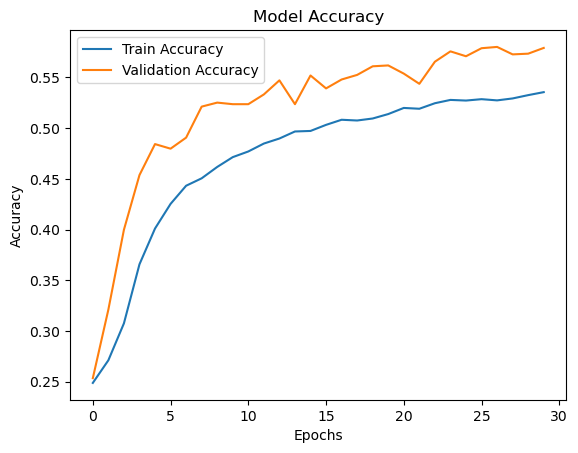

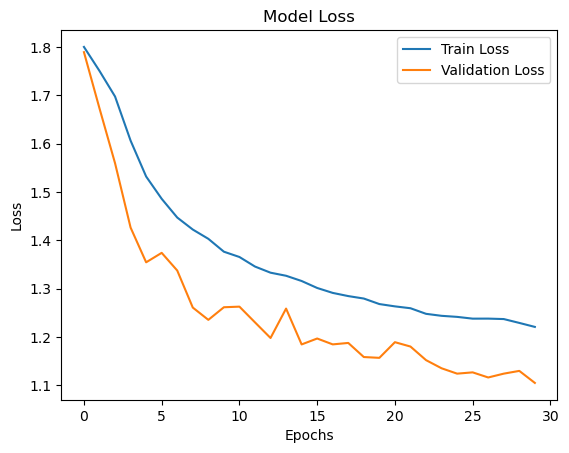

In [35]:
# Plot accuracy
plt.plot(proj_work_history.history['accuracy'], label='Train Accuracy')
plt.plot(proj_work_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(proj_work_history.history['loss'], label='Train Loss')
plt.plot(proj_work_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


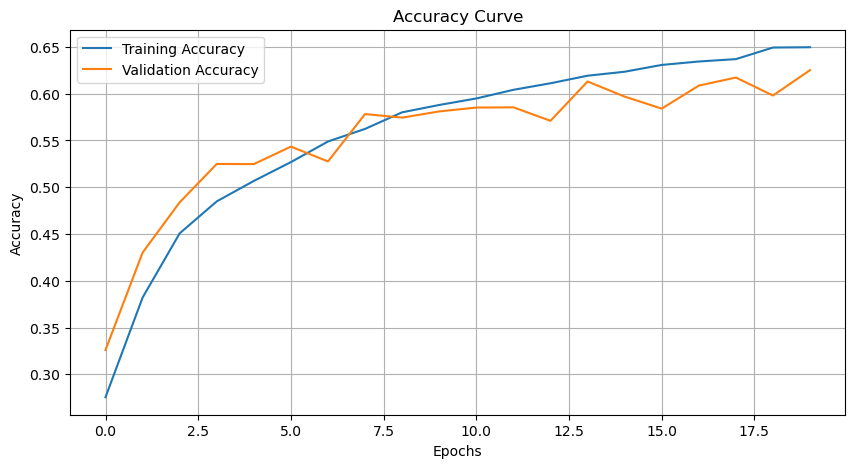

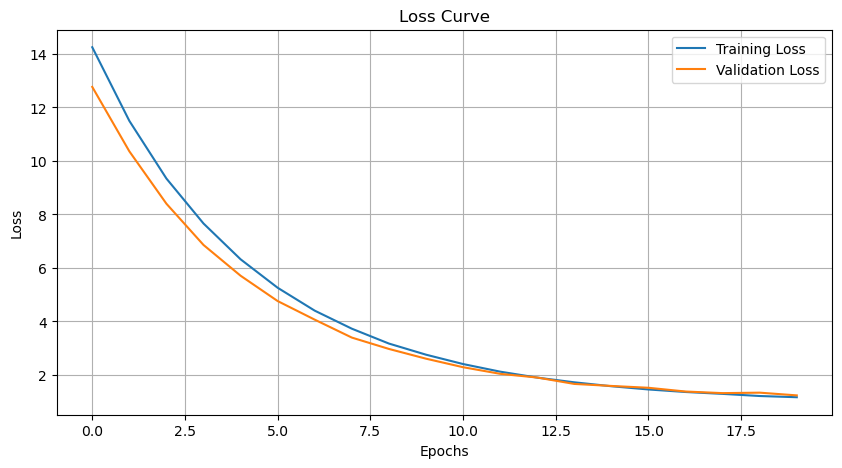

In [53]:
import matplotlib.pyplot as plt

# Extract accuracy and loss for training and validation from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
